# CAP 781 
# Regression Analysis - Polynomial Regression
## Implementation and Performance Analysis of Linear Regression, Multilinear Regression and Non-Linear Regression

## Author

- **Name**: `Tanzeela Javid Kaloo` | `Assistant Professor`
- **Department**: Systems and Architecture
- **University**: Lovely Professional University
- **Email**: tanzeela.jvd@gmail.com


## Polynomial Regression


A standard way to extend SLR to settings in which the relationship between a single feature and the response is **non-linear** has been to replace the SLR model:

$$
y_i  = \theta_0 + \theta_1 \cdot x_{i} +  \epsilon_i,
$$

with a `polynomial function with degree p`:

$$
y_i  = \theta_0 + \theta_1 \cdot x_{i} + \theta_2 \cdot x_{i}^2 + \theta_3 \cdot x_{i}^3 +
\ldots + \theta_p \cdot x_{i}^p + \epsilon_i,
$$

where $\epsilon_i \sim N(0,\sigma^2)$.

The class of models given above is known as `polynomial regression`. 
  - This model is **non-linear in the feature** $x_{i}$, meaning that we can model complex relationship between $y_i$ and $x_{i}$. In fact, for large enough degree _p_, the polynomial regression allows us to produce an extremely non-linear curve.
  - This model is just a standard multiple linear regression model with features $x_{i}, x_{i}^2, \ldots,x_{i}^p$, meaning that we can **use our familiar ordinary least squares algorithm** to learn the parameters $\boldsymbol{\theta}=(\theta_0,\theta_1,\ldots,\theta_p)^T$. 

In [2]:
#generate a synthetic data set
import numpy as np

np.random.seed(2023)

n = 200

#Generate X and y
X = np.linspace(0, 1, 100).reshape(-1, 1)  #create a sequence of length 100 from 0 to 1, with equal increments
y = np.cos(1.5 * np.pi * X) + np.random.normal(0, 0.1, X.shape)

#split the data set
from sklearn.model_selection import train_test_split

#Split 50:50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1600)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50, 1)
(50, 1)
(50, 1)
(50, 1)


## Data Exploration

The [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) function of seaborn plot the data and fit a linear regression model to the data. 

If the function parameter `order` is greater than 1, it uses `numpy.polyfit` to fit a **polynomial regression** with specified degree to the data. 

C:\Users\TJ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


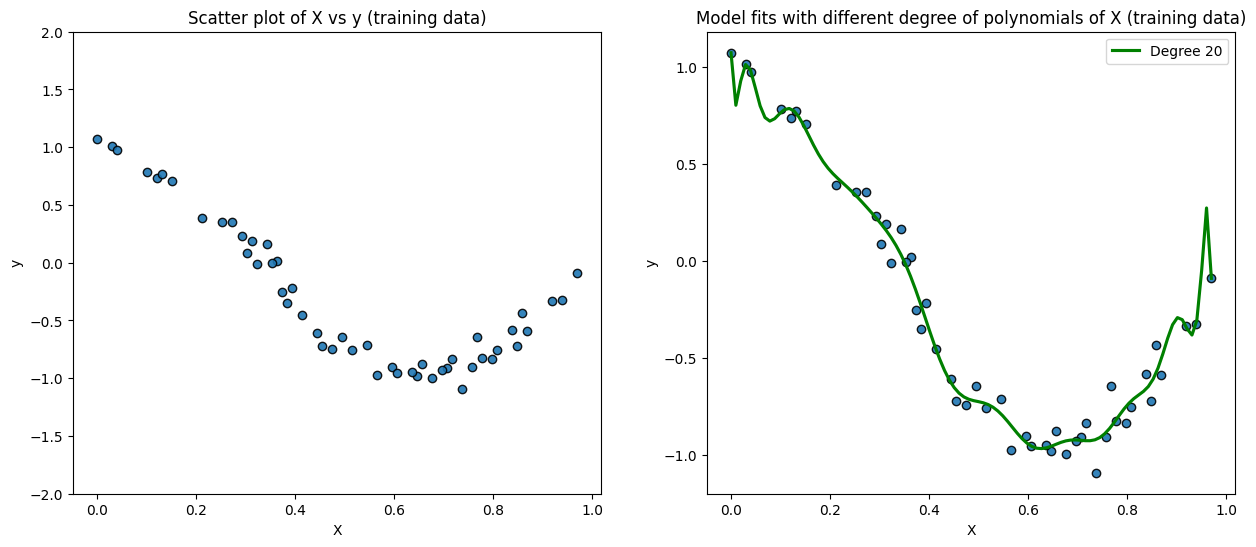

In [3]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
# https://seaborn.pydata.org/generated/seaborn.regplot.html
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
import seaborn as sns

fig, axes = plt.subplots(1,2)

# Left plot 
axes[0].scatter(x=X_train, y=y_train, edgecolors='k', alpha=0.9) 
axes[0].set_title('Scatter plot of X vs y (training data)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_ylim(-2,2)

# Right plot 
axes[1].scatter(x=X_train, y=y_train,  edgecolors='k', alpha=.9)
axes[1].set_title('Model fits with different degree of polynomials of X (training data)') 
# sns.regplot(ax=axes[1], x=X_train, y=y_train, ci=None, label='Linear', scatter=False, color='orange')
# sns.regplot(ax=axes[1], x=X_train, y=y_train, ci=None, label='Degree 2', order=2, scatter=False, color='blue')
# sns.regplot(ax=axes[1], x=X_train, y=y_train, ci=None, label='Degree 5', order=5, scatter=False, color='red')
# sns.regplot(ax=axes[1], x=X_train, y=y_train, ci=None, label='Degree 15', order=15, scatter=False, color='green')
sns.regplot(ax=axes[1], x=X_train, y=y_train, ci=None, label='Degree 20', order=20, scatter=False, color='green')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
plt.legend()
plt.show();


- `Left Plot`: When we investigate the relationship between the variables `y` and `X`, there appears to be a **non-linear relationship** between `y` and `X`. 
- In this case, we might ask whether **high-order fits** of
`X` feature may provide better results than a regression model that uses a **linear term** only.
- `Right Plot`: Here, we investigate whether polynomial regression with different orders such as 1,2,5, and 15 can better explain the relationship between `y` and `X` (Note that the colored curves plot the model predicted values with respect to `X`).

## Build a predictive polynomial model 

We would like to implement several linear regression models to predict y based on the X variable with varying number of `polynomials of X` up to 15th order such as:

$$y_i = \theta_0 +  \theta_1 *X_i + \ldots + \theta_p *X_i^p + \epsilon_i \quad$$ for $i=1,2,\ldots,n$, $p=1,2,\ldots,15$ (at most), where $\epsilon_i \sim N(0,\sigma^2)$.

So, let's fit a `2nd order polynomial regression` to this synthetic data first. 

### Polynomial features

We will use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) transformers from sckit-learn to `generate polynomial features` in the feature matrix.

In [4]:
from sklearn import set_config
set_config(transform_output="pandas")  

from sklearn.preprocessing import PolynomialFeatures

#Prepare the train feature matrix

poly = PolynomialFeatures(degree=2, include_bias=False) #include_bias=True adds a column of 1's.
X_train_poly = poly.fit_transform(X_train)
X_train_poly.head()

,x0,x0^2
0,0.868687,0.754617
1,0.737374,0.543720
2,0.656566,0.431078
3,0.474747,0.225385
4,0.494949,0.244975


In [5]:
X_test_poly = poly.transform(X_test)
X_test_poly.head()

,x0,x0^2
0,0.232323,0.053974
1,0.111111,0.012346
2,0.878788,0.772268
3,0.727273,0.528926
4,0.555556,0.308642


In [6]:
print(X_train_poly.shape)
print(y_train.shape)
print(X_test_poly.shape)
print(y_test.shape)

(50, 2)
(50, 1)
(50, 2)
(50, 1)


In [7]:
#now fit the polynomial regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X_train_poly, y_train)

LinearRegression()

In [8]:
#get predicted values
y_train_pred = regr.predict(X_train_poly)
y_test_pred = regr.predict(X_test_poly)

#line plot requires sorted data
import numpy as np
train_indices = np.argsort(X_train_poly.x0) #Returns the indices that would sort an array. input pd series
test_indices = np.argsort(X_test_poly.x0)

X_train_poly.x0.iloc[train_indices].head() #sorted from smallest to the largest

12    0.000000
30    0.030303
49    0.040404
41    0.101010
16    0.121212
Name: x0, dtype: float64

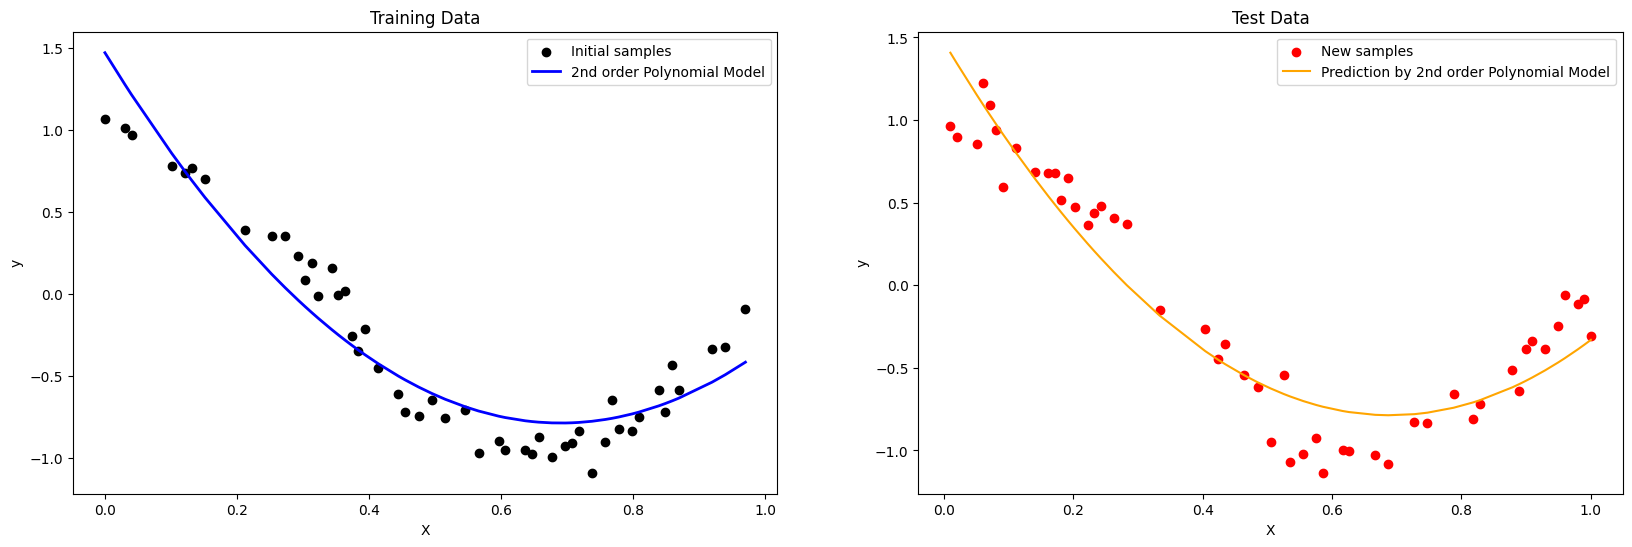

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

# Convert to numpy array before indexing
X_train_poly_np = X_train_poly.x0.to_numpy()
X_test_poly_np = X_test_poly.x0.to_numpy()

#left plot
ax1.scatter(X_train_poly_np[train_indices], y_train[train_indices], color='black')
ax1.plot(X_train_poly_np[train_indices], y_train_pred[train_indices], color='blue', linewidth=2)
ax1.set_title('Training Data')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend(['Initial samples', '2nd order Polynomial Model'])

#right plot
ax2.scatter(X_test_poly_np[test_indices], y_test[test_indices], color='red')
ax2.plot(X_test_poly_np[test_indices], y_test_pred[test_indices], color='orange')
ax2.set_title('Test Data')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend(['New samples', 'Prediction by 2nd order Polynomial Model'])

plt.show()


In [10]:
#Evalueate r2 through r2_score function
from sklearn.metrics import r2_score

print('Train R2: %.4f' % r2_score(y_train, y_train_pred))
      
print('Test R2: %.4f'  % r2_score(y_test, y_test_pred))  

Train R2: 0.9079
Test R2: 0.8979


It is obvious that 2nd order polynomial regression captures the data well.

Let's see how the model's predictive performance is changing as we increase the degree of polynomial fit from 1 to 4.

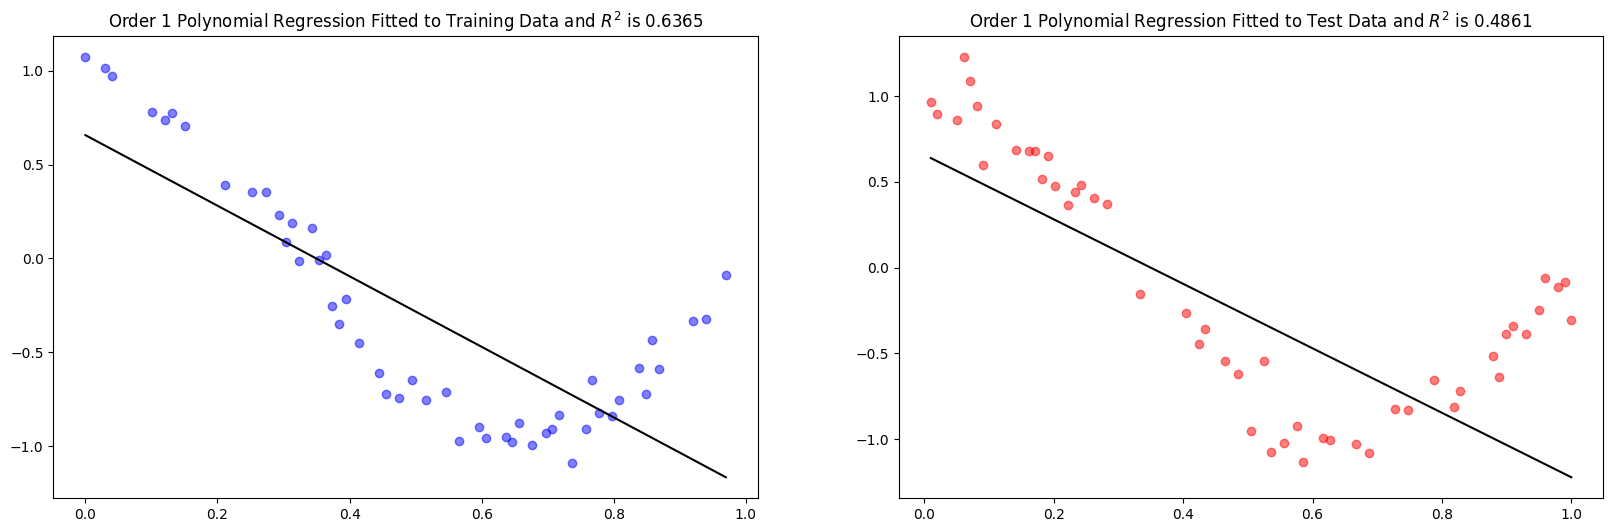

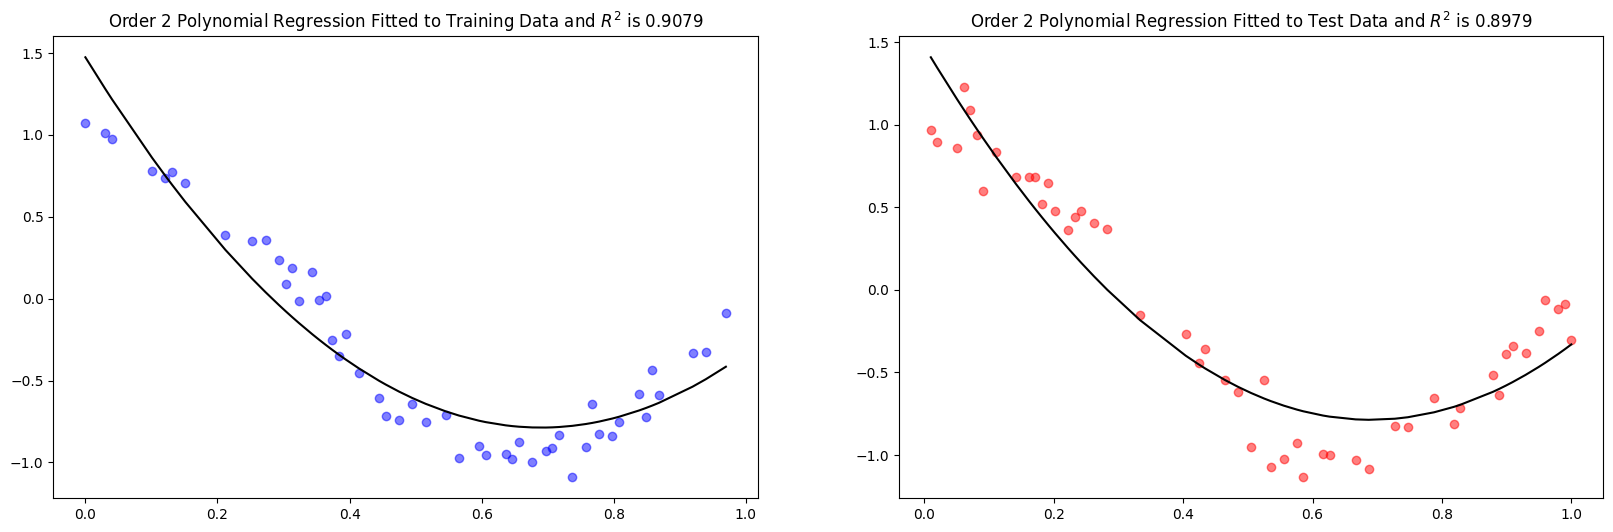

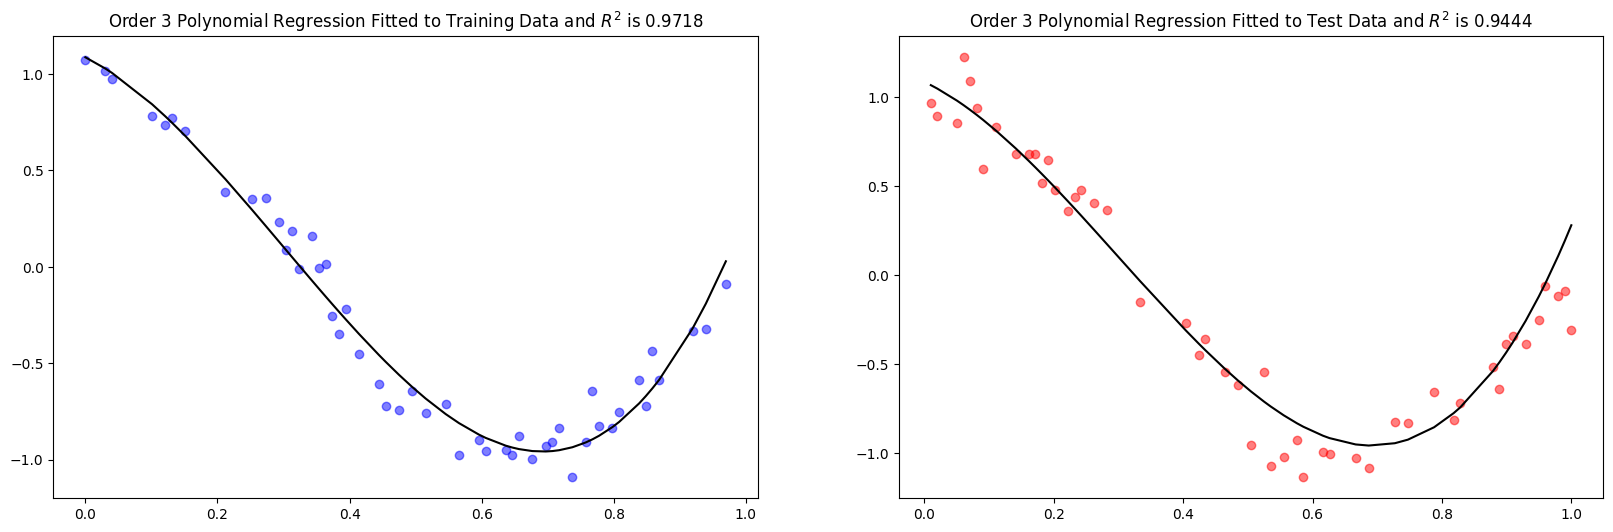

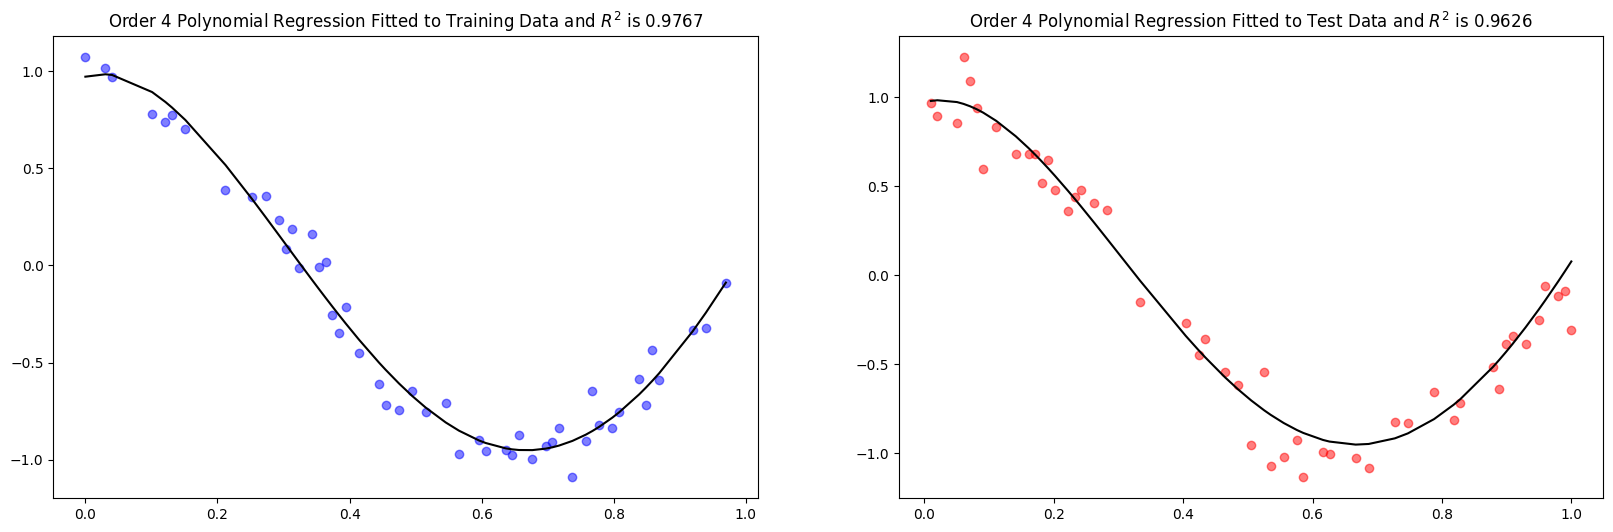

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


p_order = np.arange(1,5)

for i in range(len(p_order)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    pipe = make_pipeline(
    PolynomialFeatures(degree=p_order[i], include_bias=False),  
    LinearRegression()
    )
    
    #print(i)
    
    pipe.fit(X_train, y_train)  #X_train is a np array  #X_train_poly is a pd df
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    r2_train = pipe.score(X_train, y_train)
    r2_test = pipe.score(X_test, y_test)
    
    #indices comes from previous code block
    
    #Left plot
    ax1.scatter(X_train[train_indices], y_train[train_indices], color='blue', alpha=0.5, label="Train samples")    
    ax1.plot(X_train[train_indices], y_train_pred[train_indices], color='black', label="Predicted Model")
    ax1.set_title("Order %.f Polynomial Regression Fitted to Training Data and $R^2$ is %.4f" % (p_order[i],r2_train ))
        
    #Right plot
    ax2.scatter(X_test[test_indices], y_test[test_indices], color='red', alpha=0.5, label="Test samples")    
    ax2.plot(X_test[test_indices], y_test_pred[test_indices], color='black', label="Predicted Model")
    ax2.set_title("Order %.f Polynomial Regression Fitted to Test Data and $R^2$ is %.4f" % (p_order[i],r2_test))     
    plt.show();

We see that increasing the degree of polynomials improves the fit.

## Towards Higher-Degree Polynomial Features?

As we increase the `complexity of our model` to even higher degree polynomials, we are able to fit the data increasingly even better.

What happens if we further increase the degree of the polynomial?

In [13]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

p_order = np.arange(1,14)

results = {}


for i in range(len(p_order)):
    
    pipe = make_pipeline(
    PolynomialFeatures(degree=p_order[i], include_bias=False), 
    LinearRegression()
    )
    
    #print(i)
    
    pipe.fit(X_train, y_train)
    r2_train = pipe.score(X_train, y_train)
    r2_test = pipe.score(X_test, y_test)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    results[i] = {'p':p_order[i],
                 'R2_Train': r2_train, 
                 'R2_Test': r2_test, 
                 'MSE_Train': mse_train*10,   #multiplied by a constant to increase visibility
                 'MSE_Test': mse_test*10,  #multiplied by a constant to increase visibility
                  }
    
res_df = pd.DataFrame.from_dict(results).T
res_df

,p,R2_Train,R2_Test,MSE_Train,MSE_Test
0,1.0,0.636526,0.486131,1.409158,2.535329
1,2.0,0.907921,0.897883,0.356981,0.503826
2,3.0,0.971799,0.944355,0.109334,0.274543
3,4.0,0.976657,0.962582,0.090498,0.184612
4,5.0,0.979076,0.968994,0.081119,0.152975
5,6.0,0.980997,0.963197,0.073674,0.181580
6,7.0,0.981008,0.962533,0.073631,0.184854
7,8.0,0.981637,0.969893,0.071191,0.148540
8,9.0,0.981968,0.962533,0.069909,0.184856
9,10.0,0.982994,0.924778,0.065930,0.371132


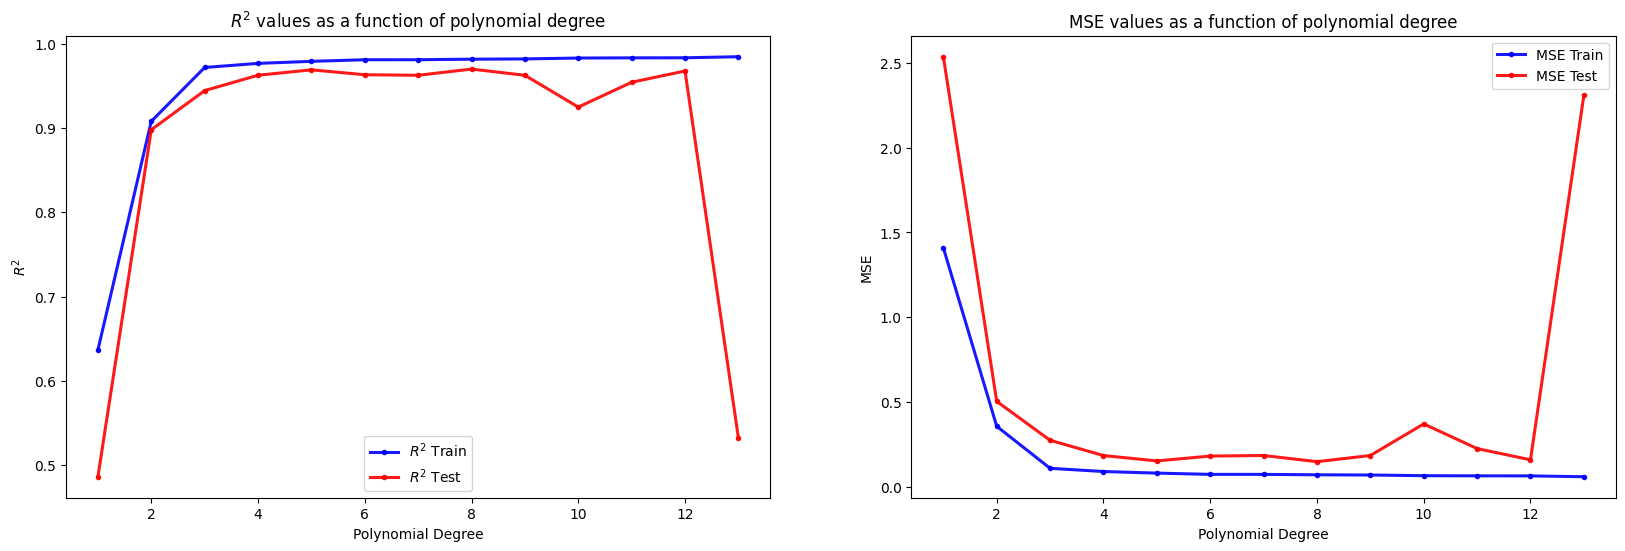

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

# Convert columns to numpy arrays for plotting
R2_Train_np = res_df.R2_Train.to_numpy()
R2_Test_np = res_df.R2_Test.to_numpy()
MSE_Train_np = res_df.MSE_Train.to_numpy()
MSE_Test_np = res_df.MSE_Test.to_numpy()

#Left plot - $R^2$ values
ax1.plot(p_order, R2_Train_np, color='blue', marker='.', alpha=0.9, linewidth=2.2)
ax1.plot(p_order, R2_Test_np, color='red', marker='.', alpha=0.9, linewidth=2.2)   
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('$R^2$')
ax1.legend(['$R^2$ Train', '$R^2$ Test'])
ax1.set_title("$R^2$ values as a function of polynomial degree")

#Right plot - MSE values
ax2.plot(p_order, MSE_Train_np, color='blue', marker='.', alpha=0.9, linewidth=2.2)
ax2.plot(p_order, MSE_Test_np, color='red', marker='.', alpha=0.9, linewidth=2.2)
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('MSE')
ax2.legend(['MSE Train', 'MSE Test'])
ax2.set_title("MSE values as a function of polynomial degree")

plt.show()


### The Problem With Increasing Model Capacity

As the degree of the polynomial increases to the size of the dataset, we are increasingly able to fit every point in the dataset.

However, this results in a highly irregular curve: its behavior outside the training set is wildly inaccurate.

# Is Polynomial Regression an Example of Non-Linear Regression?

**No**, polynomial regression is not considered non-linear regression because:

1. **Non-Linear Relationship in Variables**:  
   The relationship between the dependent variable \\( y \\) and the independent variable \\( x \\) in polynomial regression is non-linear, for example:
   $$
   y = ax^2 + bx + c
   $$

   However, the model is **linear in terms of the parameters** \\( a, b, c \\).

2. **Linear Representation in Matrix Form**:  
   The polynomial regression equation can be rewritten in matrix form:
   $$
   \mathbf{y} = \mathbf{X} \cdot \boldsymbol{\theta} + \boldsymbol{\epsilon}
   $$
   where:
   - \\( \mathbf{X} \\) is the matrix of features (e.g., \\( x, x^2, x^3 \\)).
   - \\( \boldsymbol{\theta} \\) contains the linear coefficients \\( a, b, c \\).
   - \\( \boldsymbol{\epsilon} \\) represents the error term.

   In this form, the model remains **linear with respect to the coefficients** \\( \boldsymbol{\theta} \\).

3. **Optimization Problem**:  
   Since the optimization problem involves finding **linear coefficients** (even though the powers of \\( x \\) introduce non-linearity in the input), polynomial regression is classified as a **linear regression model**.

---


## References

- James, G., Witten, D., Hastie, T., Tibshirani, R., James, G., Witten, D., and Tibshirani, R. (2021). Statistical learning. An introduction to statistical learning: with applications in R. https://www.statlearning.com/

- https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/tree/main/notebooks

In [ ]:
import session_info
session_info.show()